<a href="https://colab.research.google.com/github/Shady91-ML/Car-price---ML/blob/main/Car_price_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn import metrics

#Data loading

In [3]:
from google.colab import files
files.upload()  # wybierz kaggle.json z dysku
import os

# Utwórz folder .kaggle i przenieś plik
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Ustaw odpowiednie uprawnienia
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
#Pobieranie danych z kaggle
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho
#Rozpakowanie zip:
import zipfile

with zipfile.ZipFile("vehicle-dataset-from-cardekho.zip", 'r') as zip_ref:
    zip_ref.extractall("vehicle_data")

#Zapisanie jako DataFrame
car_df = pd.read_csv("vehicle_data/car data.csv")


Dataset URL: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
License(s): DbCL-1.0


#Data analysis

In [5]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#Checking number of rows and columns
car_df.shape

(301, 9)

In [7]:
#Checking missing values
car_df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [8]:
#Base informations about df
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#Data preprocessing


In [9]:
#Copy car_df to not modify original data
car_df_clean = car_df

In [10]:
#Fuel type encoding
car_df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [11]:
fuel_type_map ={'Petrol':0,
                'Diesel': 1,
                'CNG': 2}
car_df_clean['Fuel_Type'] = car_df['Fuel_Type'].map(fuel_type_map)

In [12]:
car_df_clean['Fuel_Type'].value_counts()

,count
Fuel_Type,
0,239
1,60
2,2


In [13]:
#Seller type encoding
car_df['Seller_Type'].value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [14]:
seller_type_map = {'Dealer': 0,
                   'Individual': 1}

car_df_clean['Seller_Type'] = car_df['Seller_Type'].map(seller_type_map)

In [15]:
car_df_clean['Seller_Type'].value_counts()

,count
Seller_Type,
0,195
1,106


In [16]:
#Transmission encoding
car_df['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


In [17]:
transmission_map = {'Manual': 0,
                    'Automatic': 1}

car_df_clean['Transmission'] = car_df['Transmission'].map(transmission_map)

In [18]:
car_df_clean['Transmission'].value_counts()

,count
Transmission,
0,261
1,40


In [19]:
#Checking if everything is encoded:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


#Splitting data

In [20]:
X = car_df_clean.drop(['Car_Name', 'Selling_Price'], axis=1)

In [21]:
Y  = car_df_clean['Selling_Price']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1968)

#Model training

In [80]:
#Model initialization
model = LinearRegression()

In [81]:
model.fit(X_train, y_train)

LinearRegression()

#Model evaluation

In [82]:
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)

In [83]:
#R squared
r_squared_error_train = metrics.r2_score(y_train, prediction_train)
print('R squared error for train data: ', r_squared_error_train)

r_squared_error_test = metrics.r2_score(y_test, prediction_test)
print('R squared error for test data: ', r_squared_error_test)

R squared error for train data:  0.8736934470480713
R squared error for test data:  0.9046988067932308


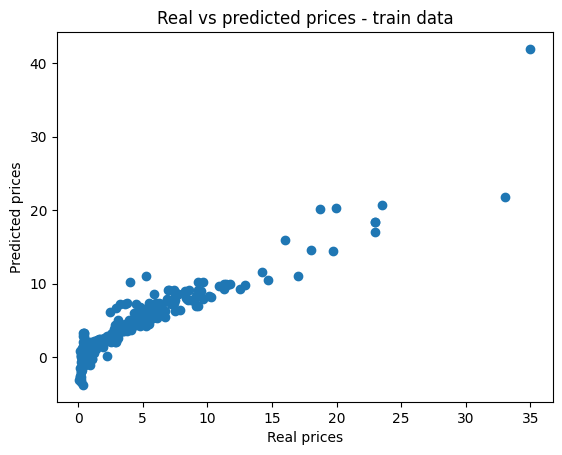

In [84]:
#Visualize real and predicted values:
plt.scatter(y_train, prediction_train)
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')
plt.title('Real vs predicted prices - train data')
plt.show()

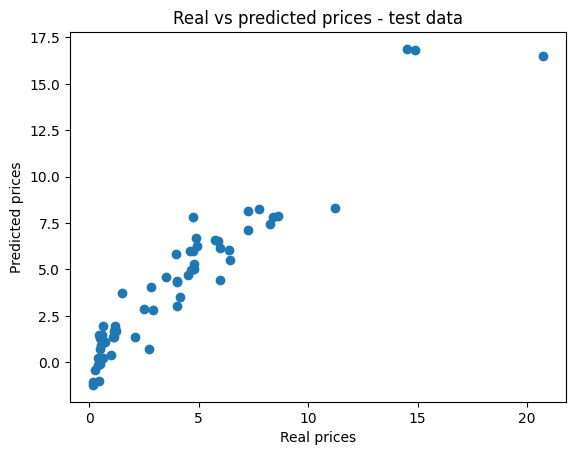

In [85]:
#Visualie real and predicted data in test data:
plt.scatter(y_test, prediction_test)
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')
plt.title('Real vs predicted prices - test data')
plt.show()

In [86]:
#Mean absolute error
MAE_train = metrics.mean_absolute_error(y_train, prediction_train)
print('Mean absolute error for train data: ', MAE_train)

MAE_test = metrics.mean_absolute_error(y_test, prediction_test)
print('Mean absolute error for test data: ', MAE_test)

Mean absolute error for train data:  1.2653385228033731
Mean absolute error for test data:  0.939600995373503


#Creating Lasso model

In [87]:
#Creating LassoCV model and preparing alphas grid to find best alpha with 5 times validation
lasso_cv = LassoCV(alphas = np.logspace(-4,1,50), cv=5)

#Train model
lasso_cv.fit(X_train, y_train)

print('Best alpha: ', lasso_cv.alpha_)


Best alpha:  0.0021209508879201904


In [88]:
#Creating lasso model:
lasso = Lasso(alpha=lasso_cv.alpha_)

In [89]:
#Train model:
lasso.fit(X_train, y_train)

Lasso(alpha=np.float64(0.0021209508879201904))

#Lasso model evaluation

In [90]:
train_lasso_predict = lasso.predict(X_train)
test_lasso_predict = lasso.predict(X_test)

#R squared error
train_lasso_r_squared = metrics.r2_score(y_train, train_lasso_predict)
test_lasso_r_squared = metrics.r2_score(y_test, test_lasso_predict)

print('R square error for train lasso data: ', train_lasso_r_squared)
print('R square error for test lasso data: ', test_lasso_r_squared)

#MAE:

train_lasso_mae = metrics.mean_absolute_error(y_train, train_lasso_predict)
test_lasso_mae = metrics.mean_absolute_error(y_test, test_lasso_predict)

print('MAE for train lasso data: ', train_lasso_mae)
print('MAE for test lasso data: ', test_lasso_mae)

R square error for train lasso data:  0.8736876715405801
R square error for test lasso data:  0.9050603985060541
MAE for train lasso data:  1.2638872934026182
MAE for test lasso data:  0.9378179365410367


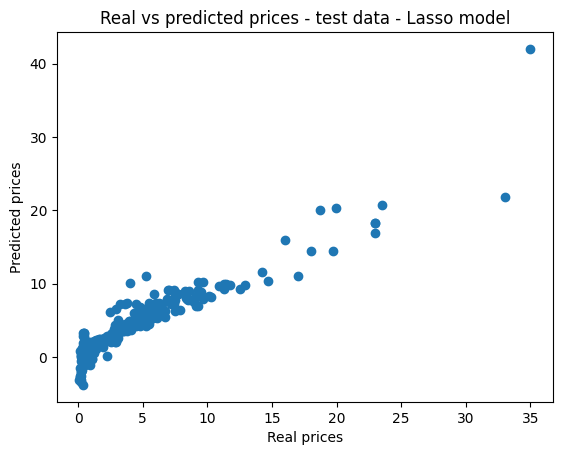

In [91]:
#Visualization
plt.scatter(y_train, train_lasso_predict)
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')
plt.title('Real vs predicted prices - test data - Lasso model')
plt.show()

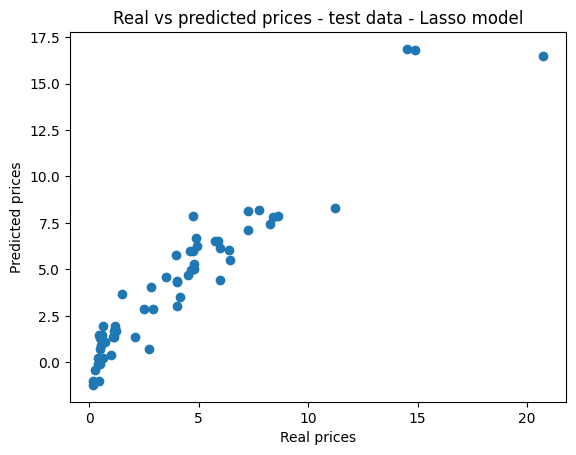

In [92]:
#Visualization
plt.scatter(y_test, test_lasso_predict)
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')
plt.title('Real vs predicted prices - test data - Lasso model')
plt.show()

#Compare Linear regression and Lasso

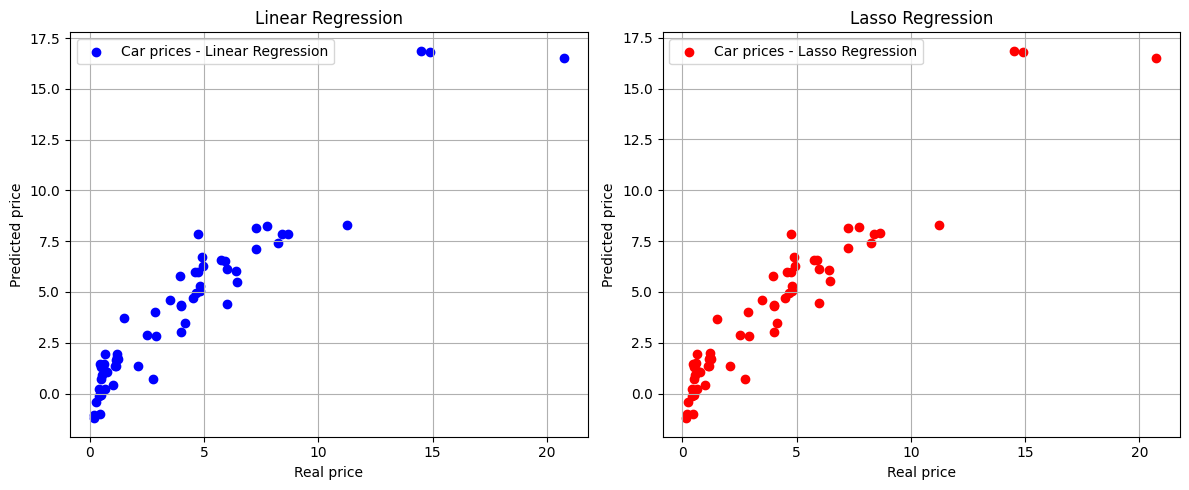

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear Regression
axes[0].scatter(y_test, prediction_test, label="Car prices - Linear Regression", color='blue')
axes[0].set_title("Linear Regression")
axes[0].set_xlabel("Real price")
axes[0].set_ylabel("Predicted price")
axes[0].legend()
axes[0].grid(True)

# Lasso Regression
axes[1].scatter(y_test, test_lasso_predict, label="Car prices - Lasso Regression", color='red')
axes[1].set_title("Lasso Regression")
axes[1].set_xlabel("Real price")
axes[1].set_ylabel("Predicted price")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

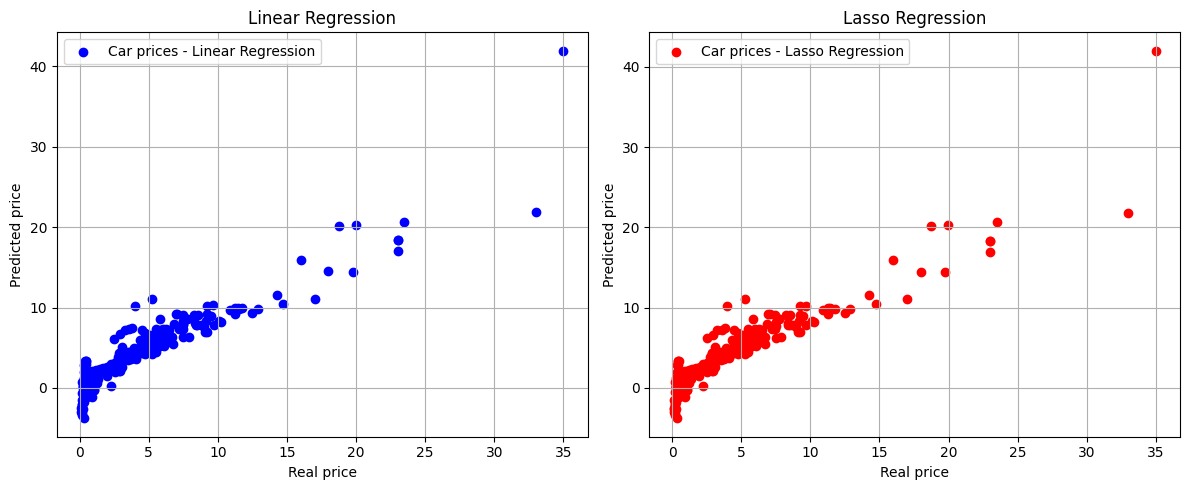

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear Regression
axes[0].scatter(y_train, prediction_train, label="Car prices - Linear Regression", color='blue')
axes[0].set_title("Linear Regression")
axes[0].set_xlabel("Real price")
axes[0].set_ylabel("Predicted price")
axes[0].legend()
axes[0].grid(True)

# Lasso Regression
axes[1].scatter(y_train, train_lasso_predict, label="Car prices - Lasso Regression", color='red')
axes[1].set_title("Lasso Regression")
axes[1].set_xlabel("Real price")
axes[1].set_ylabel("Predicted price")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()